In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df=pd.read_csv('cars.csv')

In [69]:
col=[]
for i in df.columns:
    col.append(i.replace(' ',''))

In [70]:
df.columns=col

In [71]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [72]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [73]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [74]:
df.cubicinches.astype('int')

ValueError: invalid literal for int() with base 10: ' '

<h2>This means there are rows with <i><u>spaces</i></u>  for cubicinches column

In [75]:
df.loc[df.cubicinches==' ','cubicinches']=np.nan

In [76]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [77]:
df.cubicinches.fillna(value=df.cubicinches.median(),inplace=True)

In [90]:
df.cubicinches=df.cubicinches.astype('int')

In [78]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [80]:
df.weightlbs.head()

0    4209
1    1925
2    3449
3    3761
4    2051
Name: weightlbs, dtype: object

In [81]:
df.weightlbs.astype('int')

ValueError: invalid literal for int() with base 10: ' '

<h2> Same problem with weightlbs column

In [82]:
df.loc[df.weightlbs==' ','weightlbs']=np.nan

In [83]:
df.weightlbs.isnull().sum()

3

In [84]:
df.weightlbs.fillna(value=df.weightlbs.median(),inplace=True)

In [89]:
df.weightlbs=df.weightlbs.astype('int')

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.brand=le.fit_transform(df.brand)

In [99]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches      int32
hp               int64
weightlbs        int32
time-to-60       int64
year             int64
brand            int32
dtype: object

In [118]:
df.shape

(261, 8)

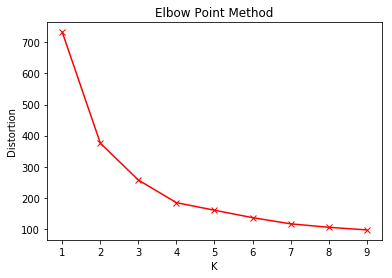

In [123]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,verbose=0,n_jobs=-1)
    kmeans.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
    #The above line calculates the distance of each row from all the centeroids and then choses the minimum distance and adds them for ever example. 
k=range(1,10)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Point Method')
plt.plot(k, distortions, 'rx-')

Elbow Point occurs at k=4

In [134]:
kmeans=KMeans(n_clusters=4,verbose=0,n_jobs=-1,max_iter=500)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
kmeans.cluster_centers_

array([[1.42638298e+01, 8.00000000e+00, 3.63297872e+02, 1.66276596e+02,
        4.35934043e+03, 1.28723404e+01, 1.97487234e+03, 2.00000000e+00],
       [3.09404762e+01, 3.98809524e+00, 9.65476190e+01, 7.09404762e+01,
        2.09261905e+03, 1.70238095e+01, 1.97730952e+03, 8.92857143e-01],
       [2.39466667e+01, 4.86666667e+00, 1.61720000e+02, 9.54533333e+01,
        2.79021333e+03, 1.59733333e+01, 1.97796000e+03, 1.38666667e+00],
       [1.77345455e+01, 6.96363636e+00, 2.73381818e+02, 1.24127273e+02,
        3.54914545e+03, 1.50000000e+01, 1.97618182e+03, 1.85454545e+00]])

In [135]:
kmeans.fit_predict(df)

array([1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 3, 3, 1, 2, 0, 1, 3, 2, 3, 3, 3, 0,
       0, 1, 3, 3, 3, 1, 2, 3, 3, 2, 0, 0, 3, 2, 3, 0, 1, 2, 2, 1, 2, 2,
       0, 0, 2, 3, 3, 0, 1, 2, 2, 3, 1, 1, 0, 3, 3, 2, 0, 3, 0, 3, 1, 2,
       3, 3, 3, 2, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 1, 1, 2, 0, 3, 3, 0, 2,
       3, 0, 3, 3, 1, 2, 3, 2, 1, 0, 2, 2, 1, 1, 3, 3, 3, 0, 3, 3, 0, 2,
       3, 0, 1, 3, 3, 2, 0, 0, 3, 1, 3, 3, 1, 0, 3, 0, 1, 3, 0, 3, 3, 0,
       1, 2, 1, 1, 3, 2, 0, 0, 0, 3, 0, 3, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0,
       0, 2, 3, 3, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       1, 2, 2, 3, 0, 3, 1, 2, 3, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 0, 3,
       3, 3, 3, 0, 2, 2, 3, 2, 3, 0, 1, 0, 0, 2, 3, 3, 2, 0, 3, 1, 0, 1,
       2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 0, 1, 0, 3, 1, 0, 3, 3, 1, 0,
       1, 0, 1, 2, 2, 3, 3, 0, 3, 0, 0, 1, 0, 3, 2, 3, 0, 2, 2])

These are the centers of 4 clusters